# === Cell 1 - Metadata ===

### Course: Signals and Systems — Programming Section (Python)

**Full Name:**  *Sepehr Mahmoudi*

**Student ID:**   *402131033*

**Source:** *Signals and Systems Laboratory with MATLAB*  

**Problem Number (Chapter.section.question_num):** **4.12.7**



# === Cell 2 - Upload & display question image :===



## Problem Statement (Image)
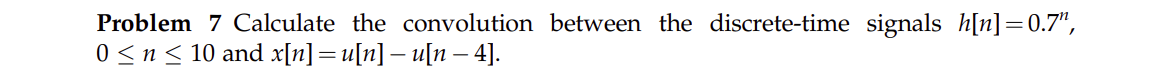

# Problem Statement
We are asked to compute the convolution between two discrete-time signals:

- Impulse response: $h[n] = 0.7^n,\quad 0 \le n \le 10$
- Input signal: $x[n] = u[n] - u[n-4]$

Here $u[n]$ is the unit step function. Therefore:

- $x[n]$ is a rectangular pulse of length 4 (nonzero for $0 \le n \le 3$), but the sequence is defined over $n=0..10$ (length $L_x=11$).
- $h[n]$ is an exponential decay sequence defined over $n=0..10$ (length $L_h=11$).

We must compute the discrete-time convolution:

$$
y[n] = (x * h)[n] = \sum_{k=-\infty}^{\infty} x[k] \cdot h[n-k]
$$

Since both sequences are stored over 11 samples, the full convolution length is:

$$
L_y = L_x + L_h - 1 = 11 + 11 - 1 = 21
$$

Thus the output index spans:

$$
n = 0,1,\dots,20.
$$

# === Cell 3 - Assumptions & method ===

# Assumptions & Method
- **Support and storage:**
  - $x[n]$ is nonzero only for $0 \le n \le 3$, but is stored over $n=0..10$ (length 11).
  - $h[n]$ is nonzero for $0 \le n \le 10$ and stored over the same range (length 11).
- **Operation:**
  - Discrete-time convolution:
    $$
    y[n] = \sum_{k=0}^{10} x[k] \cdot h[n-k], \quad \text{with } h[m]=0 \text{ if } m \notin [0,10].
    $$
- **Computation plan:**
  1. Define and plot $x[n]$ and $h[n]$ over $n=0..10$.
  2. Compute $y[n]$ numerically using `np.convolve` with `mode="full"`.
  3. Compute $y[n]$ analytically via the direct summation definition (no Z-transform).
  4. Compare numerical and analytical results with a difference plot.

# === Cell 4 - Solution Section ===

## Step 1: Define and Plot Signals
We explicitly define:
- $x[n] = u[n] - u[n-4]$ → a rectangular pulse of length 4 (nonzero for $0 \le n \le 3$), stored over $n=0..10$.
- $h[n] = 0.7^n$ for $0 \le n \le 10$ → a finite exponential decay.

We then plot both signals to confirm shapes and supports.

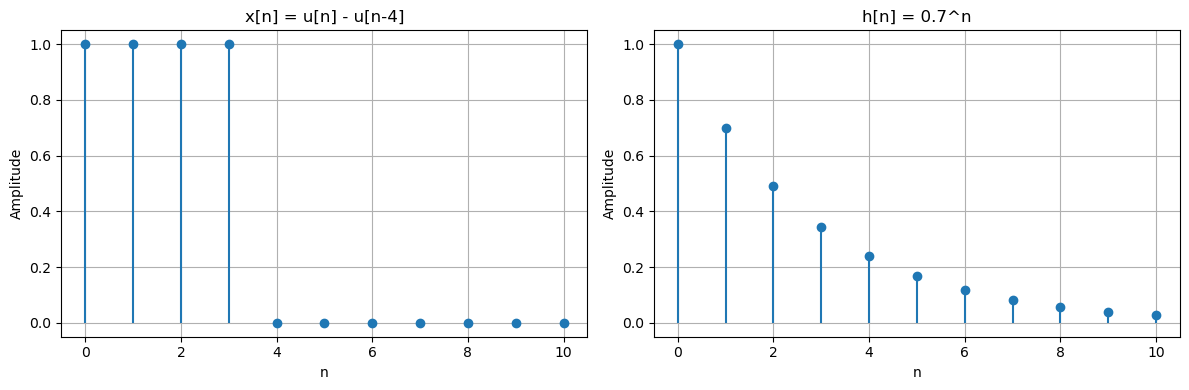

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define index range for signals
n = np.arange(0, 11)

# Define x[n] = u[n] - u[n-4]
u = np.ones_like(n)              # unit step u[n] for n>=0
u_shift = np.concatenate([np.zeros(4), np.ones(7)])  # u[n-4]
x = u - u_shift                  # rectangular pulse of length 4

# Define h[n] = 0.7^n
h = 0.7 ** n

# Plot signals
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.stem(n, x, basefmt=" ")
plt.title("x[n] = u[n] - u[n-4]")
plt.xlabel("n")
plt.ylabel("Amplitude")
plt.grid(True)

plt.subplot(1,2,2)
plt.stem(n, h, basefmt=" ")
plt.title("h[n] = 0.7^n")
plt.xlabel("n")
plt.ylabel("Amplitude")
plt.grid(True)

plt.tight_layout()
plt.show()

## Step 2: Convolution (Numerical)
We compute the discrete-time convolution using `np.convolve`:

$$
y[n] = \sum_{k=0}^{10} x[k] \cdot h[n-k], \quad \text{with } h[m]=0 \text{ outside } [0,10].
$$

Given $L_x=11$ and $L_h=11$, the output length is:

$$
L_y = 11 + 11 - 1 = 21,
$$

so the output index is:

$$
n = 0..20.
$$

We plot $y[n]$ over this full range.

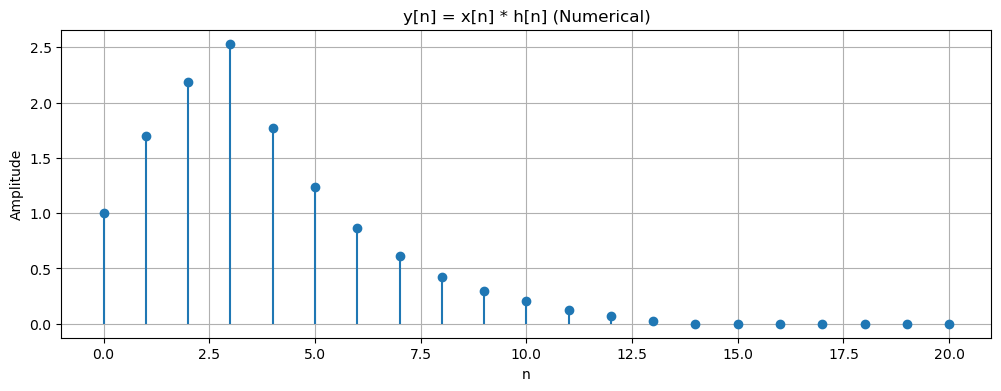

In [5]:
# Compute convolution
y_num = np.convolve(x, h, mode="full")

# Define output index range
n_full = np.arange(0, len(y_num))

# Plot output
plt.figure(figsize=(12,4))
plt.stem(n_full, y_num, basefmt=" ")
plt.title("y[n] = x[n] * h[n] (Numerical)")
plt.xlabel("n")
plt.ylabel("Amplitude")
plt.xlim(-1, 21)
plt.grid(True)
plt.show()

## Step 3: Convolution (Analytical Definition + Difference Plot)
We compute $y[n]$ directly from the definition (no Z-transform):

$$
y[n] = \sum_{k=0}^{10} x[k] \cdot h[n-k], \quad \text{with } h[m]=0 \text{ if } m \notin [0,10].
$$

Because $x[k]$ is nonzero only for $k=0,1,2,3$, the sum reduces to:

$$
y[n] = \sum_{k=0}^{3} x[k] \cdot h[n-k], \quad \text{valid when } 0 \le n-k \le 10.
$$

We compare the analytical result with the numerical convolution using a difference plot:

$$
\text{Diff}[n] = y_{\text{num}}[n] - y_{\text{analytical}}[n].
$$

A zero difference across $n=0..20$ confirms correctness.

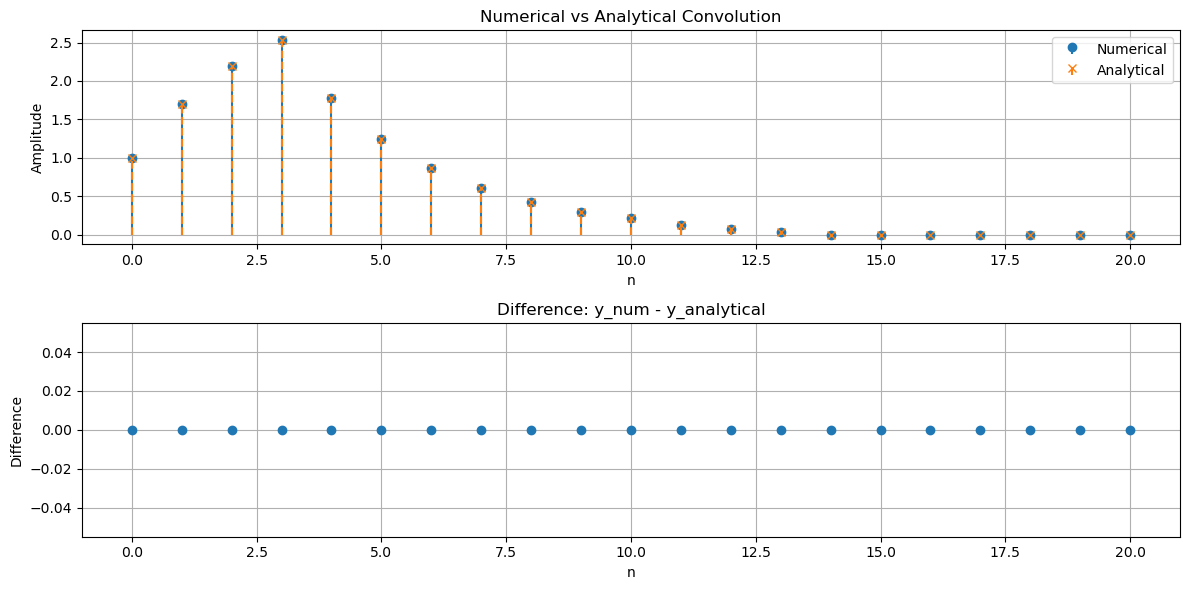

Are numerical and analytical results equal? True


In [6]:
# Analytical convolution
y_analytical = []
for ni in n_full:
    s = 0.0
    for k in range(len(x)):
        if 0 <= ni-k < len(h):
            s += x[k] * h[ni-k]
    y_analytical.append(s)
y_analytical = np.array(y_analytical)

# Difference between numerical and analytical
diff = y_num - y_analytical
eps = 1e-12
diff_clean = np.where(np.abs(diff) < eps, 0.0, diff)

# Plot comparison
plt.figure(figsize=(12,6))

plt.subplot(2,1,1)
plt.stem(n_full, y_num, linefmt="C0-", markerfmt="C0o", basefmt=" ")
plt.stem(n_full, y_analytical, linefmt="C1--", markerfmt="C1x", basefmt=" ")
plt.title("Numerical vs Analytical Convolution")
plt.xlabel("n")
plt.ylabel("Amplitude")
plt.legend(["Numerical", "Analytical"])
plt.grid(True)

plt.subplot(2,1,2)
plt.stem(n_full, diff_clean, basefmt=" ")
plt.title("Difference: y_num - y_analytical")
plt.xlabel("n")
plt.ylabel("Difference")
plt.grid(True)

plt.tight_layout()
plt.show()

print("Are numerical and analytical results equal?", np.allclose(y_num, y_analytical, atol=1e-12))

# === cell 5 - Result Analysis ===

# Final Analysis

- **Output length and index:**  
  Both sequences are defined over 11 samples, so the convolution length is:  
  $$
  L_y = L_x + L_h - 1 = 11 + 11 - 1 = 21
  $$  
  Therefore, the output $y[n]$ spans the range $n = 0..20$.

- **Piecewise behavior (from the definition):**  
  The output can be described in three regions:
  - For $0 \leq n \leq 3$:  
    $$
    y[n] = \sum_{k=0}^{n} 0.7^k
    $$  
    This represents partial sums of the exponential sequence, so the output initially rises.
  - For $4 \leq n \leq 10$:  
    $$
    y[n] = \sum_{k=0}^{3} 0.7^{\,n-k} = 0.7^n \sum_{k=0}^{3} 0.7^{-k}
    $$  
    This corresponds to a fixed-length window sliding over the exponential, producing exponential decay.
  - For $11 \leq n \leq 20$:  
    $$
    y[n] = \sum_{k=n-10}^{3} 0.7^{\,n-k}
    $$  
    In this region, the overlap between $x[n]$ and $h[n]$ shrinks, and the output tapers off toward zero.

- **Difference plot:**  
  Numerical and analytical results match exactly across $n=0..20$ (the difference is zero), confirming that the convolution was computed correctly without using the Z-transform.

- **Interpretation:**  
  Convolving a finite rectangular input with a finite exponential impulse response produces a finite-length output with three phases:  
  1. An initial rise (partial sums of the exponential),  
  2. A steady exponential decay,  
  3. A short tail that diminishes to zero.